In [8]:
import pandas as pd
import numpy as np
from fastcore.all import *
from fastai.tabular.all import *

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Define the dependent variable and the categorical and continuous variables
dep_var = 'target'
cat_names = []
cont_names = ['area','perimeter','major_axis','minor_axis','eccentricity','eqdiasq','solidity','convex_area','extent','aspect_ratio','roundness','compactness','shapefactor_1','shapefactor_2','shapefactor_3','shapefactor_4']

procs = [Categorify, FillMissing, Normalize]

# Create a TabularDataLoaders object
dls = TabularDataLoaders.from_df(train_df, y_names=dep_var, cont_names=cont_names, procs=procs, bs=32)

dls.show_batch()
# Create a tabular learner
learn = tabular_learner(dls, metrics=accuracy, opt_func=Adam, layers=[1000,500], n_out=1)



,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,66035.000374,2038.505963,435.733001,207.499893,0.8793,289.962709,0.8606,76728.999791,0.6566,2.0999,0.1997,0.6655,0.0066,0.0031,0.4428,0.9299,1.0
1,107569.999973,2490.262958,476.457490,309.441407,0.7604,370.084289,0.9253,116260.000083,0.7520,1.5397,0.2180,0.7767,0.0044,0.0029,0.6033,0.9290,0.0
2,93512.000567,1192.151978,456.823486,261.970094,0.8192,345.055297,0.9871,94738.000150,0.7622,1.7438,0.8268,0.7553,0.0049,0.0028,0.5705,0.9949,0.0
3,63231.000369,1107.588986,427.686401,192.812605,0.8926,283.739685,0.9453,66893.000048,0.6484,2.2181,0.6477,0.6634,0.0068,0.0030,0.4401,0.9763,1.0
4,89083.999681,2043.234979,424.614898,284.724703,0.7419,336.786713,0.9113,97758.000280,0.7534,1.4913,0.2681,0.7932,0.0048,0.0032,0.6291,0.9382,0.0
5,92901.999990,1569.418948,454.728088,264.478791,0.8135,343.928009,0.9657,96199.000085,0.7548,1.7193,0.4740,0.7563,0.0049,0.0028,0.5720,0.9835,0.0
6,98958.999364,1328.329953,469.587891,287.253601,0.7911,354.962709,0.9078,109004.999390,0.6880,1.6348,0.7048,0.7559,0.0047,0.0029,0.5714,0.9341,0.0
7,37129.999446,1085.461053,370.597685,136.555204,0.9296,217.429003,0.8889,41771.001150,0.6703,2.7139,0.3960,0.5867,0.0100,0.0037,0.3442,0.9342,1.0
8,68538.999658,1078.831046,445.562592,197.196395,0.8967,295.409087,0.9815,69828.999730,0.7889,2.2595,0.7400,0.6630,0.0065,0.0029,0.4396,0.9932,1.0
9,82805.000016,1737.234007,426.973114,253.685500,0.8044,324.700806,0.9627,86015.000012,0.7367,1.6831,0.3448,0.7605,0.0052,0.0031,0.5783,0.9734,0.0


SuggestedLRs(valley=0.0014454397605732083)

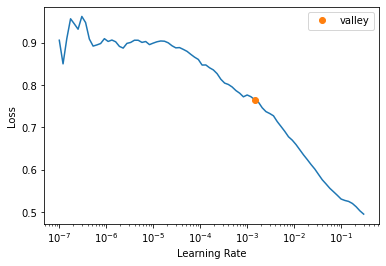

In [6]:
learn.lr_find()


In [9]:
# Train the model
learn.fit_one_cycle(100, 3e-3)

# Make predictions on the test data
test_dl = dls.test_dl(test_df)
preds, _ = learn.get_preds(dl=test_dl)
preds = np.argmax(preds, axis=1)

# Save the predictions to a file
np.savetxt('answers.csv', preds, fmt='%d')

epoch,train_loss,valid_loss,accuracy,time
0,0.532506,0.374236,0.474708,00:00
1,0.456096,0.349946,0.474708,00:00
2,0.378112,0.325818,0.474708,00:00
3,0.334962,0.254891,0.474708,00:00
4,0.274592,0.200059,0.474708,00:00
5,0.223070,0.167159,0.474708,00:00
6,0.193796,0.206134,0.474708,00:00
7,0.174360,0.195243,0.474708,00:00
8,0.158284,0.197596,0.474708,00:00
9,0.159697,0.255905,0.474708,00:00
